In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from Utils_functions import Load_initial_data, standardized_data, dbscan_iteration, neighbors_eps, hdbscan_iteration, dbscan_find_best_params, hdbscan_find_best_params

---------------------------------------
Affichage données initiales            s-set1.arff


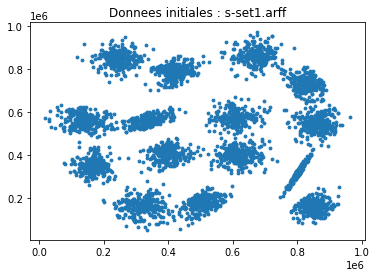

Affichage données standardisées            


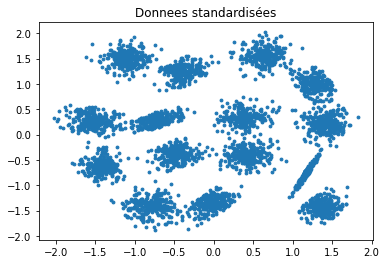

In [95]:
name="s-set1.arff"
loaded_data = Load_initial_data(name)
scaled_data = standardized_data(loaded_data)


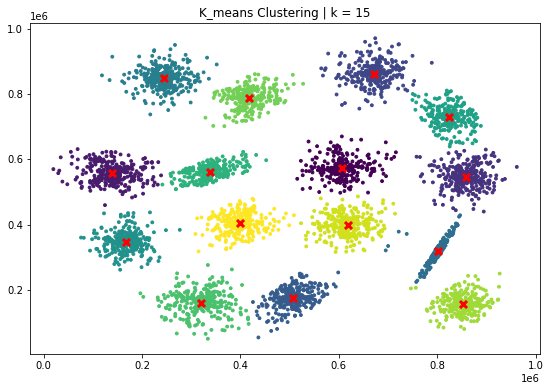

0.7112892644457176


In [96]:
#Function that determines the best silhouette score for kmeans algorithm
def kmeans_iteration(loaded_data, k):

    silhouette_scores = []
    for i in range(2, k+1):
        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model.fit(loaded_data["data"])
        tps2 = time.time()
        labels = model.labels_
        iteration = model.n_iter_
        inertie = model.inertia_
        centroids = model.cluster_centers_
        silhouette_scores.append(silhouette_score(loaded_data["data"], labels))

    max_silhouette_index = np.argmax(silhouette_scores)
    max_silhouette_score = silhouette_scores[max_silhouette_index]
    plt.scatter(loaded_data["f0"], loaded_data["f1"], c=labels, s=8)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
    plt.title("K_means Clustering | k = " + str(k))
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.savefig("kmeans_test.png", format = 'jpg')
    plt.show()
    kmeans_result = {}
    kmeans_result["labels"] = labels
    kmeans_result["iteration"] = iteration
    kmeans_result["runtime"] = round((tps2 - tps1) * 1000, 2)
    kmeans_result["silhouette_max_score"] = max_silhouette_score
    return kmeans_result

kmeans_result = kmeans_iteration(loaded_data, 15)
print(kmeans_result["silhouette_max_score"])


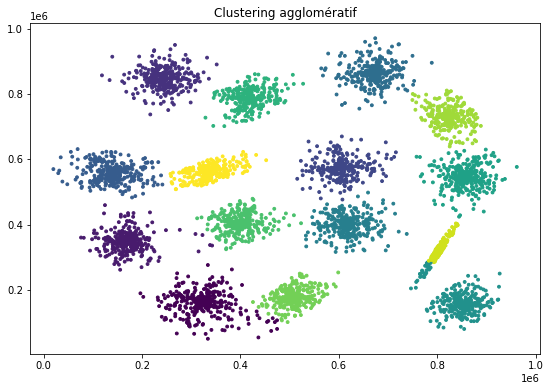

In [86]:
def agglomerative_iteration(loaded_data, linkage,distance=None, k=None):
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold=distance, linkage=linkage, n_clusters=None)
    model = model.fit(loaded_data["data"])
    tps2 = time.time()
    labels = model.labels_
    n_clusters = model.n_clusters_
    leaves = model.n_leaves_
    plt.scatter(loaded_data["f0"], loaded_data["f1"], c=labels, s=8)
    plt.title("Clustering agglomératif")
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.savefig("agglo_test.png", format = 'jpg')
    plt.show()
    agglo_result = {}
    agglo_result["runtime"] = round((tps2 - tps1) * 1000, 2)
    agglo_result["k"] = n_clusters
    agglo_result["labels"] = labels
    agglo_result["leaves"] = leaves
    return agglo_result

agglo_result = agglomerative_iteration(loaded_data2, 'complete',300000)



In [93]:
#Function that determines the best silhouette score for agglomerative algorithm 
def agglomerative_evaluation(loaded_data, linkage, min_distance, max_distance, step):
    distance_list = []
    silhouette_scores = []
    runtime_list = []
    best_distance = 0
    best_score = 0

    for i in range(min_distance, max_distance, step):
        agglo_result = agglomerative_iteration(loaded_data, linkage, distance=i * 0.1)

        if agglo_result["k"] == 1:
            continue

        runtime_list.append(agglo_result["runtime"] * 0.01)
        distance_list.append(i * 0.1)

        # Silhouette index: the higher the index, the better the clustering
        sc_sil = metrics.silhouette_score(loaded_data["data"], agglo_result["labels"], metric='euclidean')
        silhouette_scores.append(sc_sil) 

        if sc_sil > best_score:
            best_score = sc_sil
            best_distance = i * 0.1

    print(best_score)
    return [best_distance, best_score]




In [99]:
def cluster_comparative_analysis(loaded_data):

    clustering_scores=[]
    
    kmeans_result=kmeans_iteration(loaded_data, 15)
    best_score_kmeans=kmeans_result["silhouette_max_score"]
    clustering_scores.append(best_score_kmeans)

    

    agglo_result = agglomerative_evaluation(loaded_data, 'complete', 100000,300000 , 100000)
    best_score_aggro = agglo_result[1]
    clustering_scores.append(best_score_aggro)
    
    dbscan_list= dbscan_find_best_params(scaled_data, 15)
    best_eps=dbscan_list[0]
    best_min_samples_dbscan=dbscan_list[1]
    best_score_dbscan=dbscan_list[2]
    clustering_scores.append(best_score_dbscan)
    
    min_cluster_size_range = [5,10,15]
    hdbscan_list=hdbscan_find_best_params(scaled_data, 10,min_cluster_size_range)
    best_min_samples_hdbscan=hdbscan_list[0]
    best_score_hdbscan=hdbscan_list[1]
    clustering_scores.append(best_score_hdbscan)
 
    # Plotting the clustering scores
    algorithms = ['KMeans', 'Agglomerative', 'DBSCAN', 'HDBSCAN']
    plt.bar(algorithms, clustering_scores, color=['blue', 'green', 'orange', 'red'])
    plt.ylabel('Silhouette Score')  # You can change this label based on your scoring metric
    plt.title('Clustering Algorithm Comparison')
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.savefig("sil_sc_graph2.png", format = 'jpg')
    plt.show()
    print("scores :"+str(clustering_scores))
    
    return None

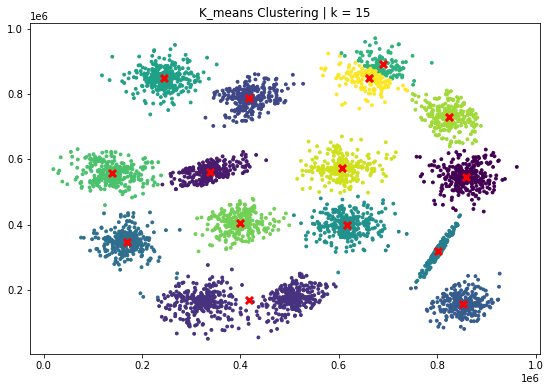

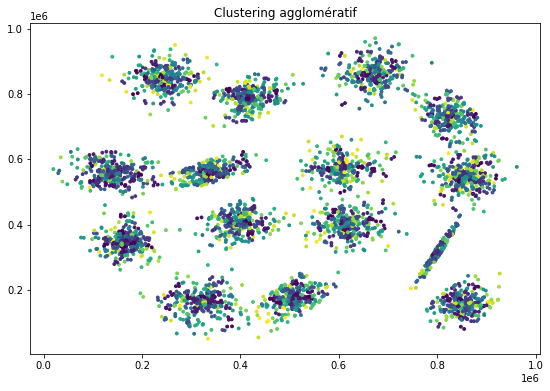

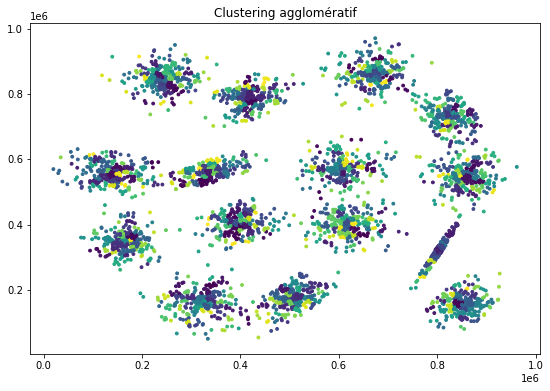

0.36712991945984624


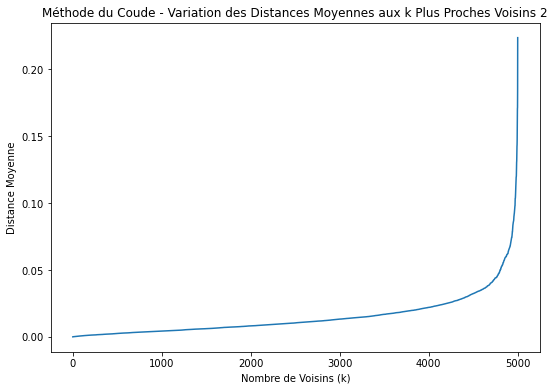

Number of clusters: 152
Number of noise points: 239


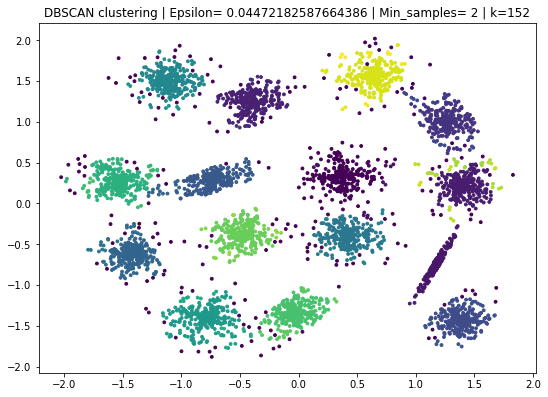

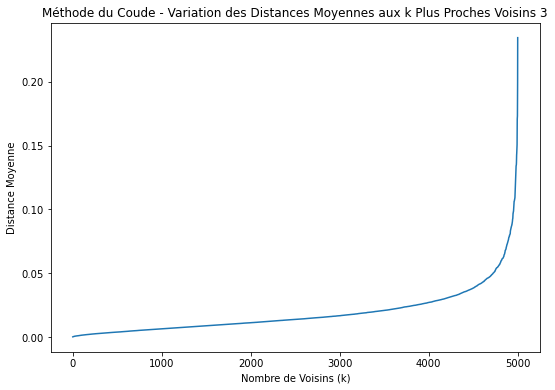

Number of clusters: 72
Number of noise points: 369


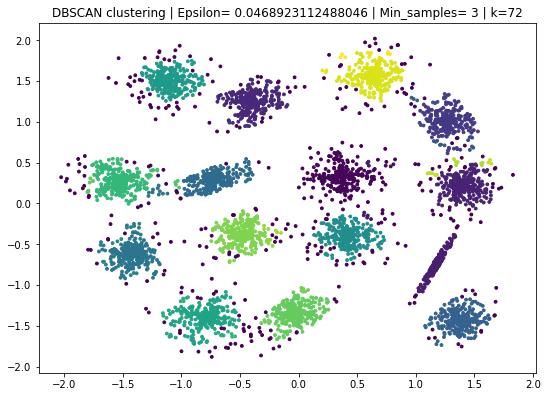

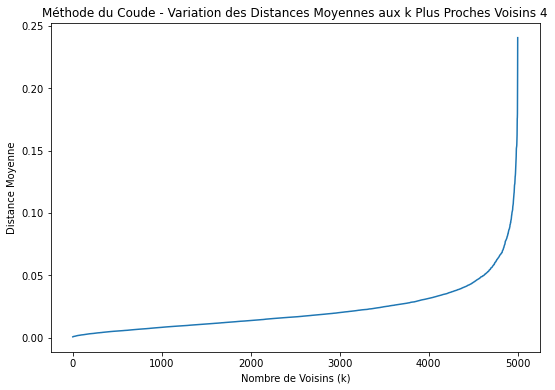

Number of clusters: 49
Number of noise points: 461


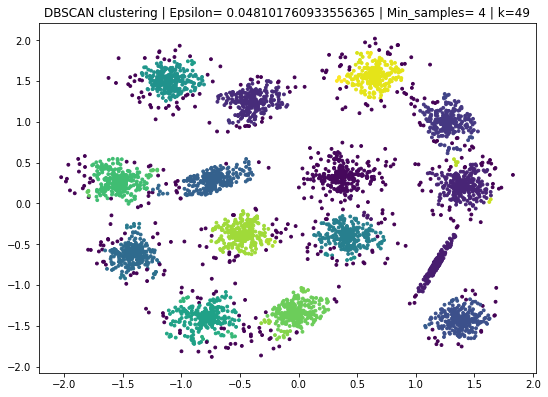

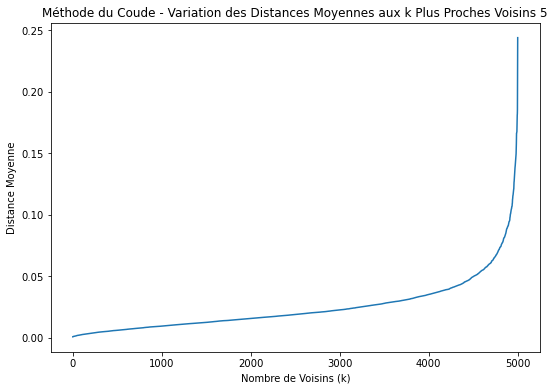

Number of clusters: 38
Number of noise points: 593


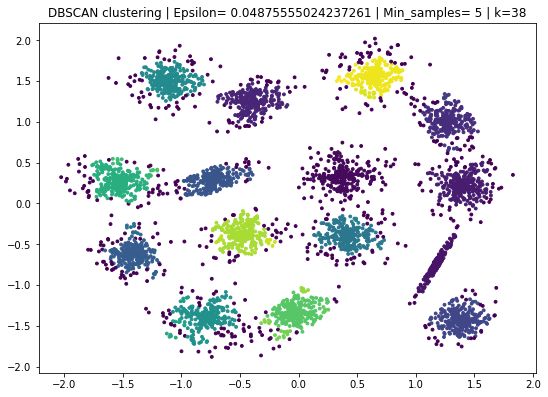

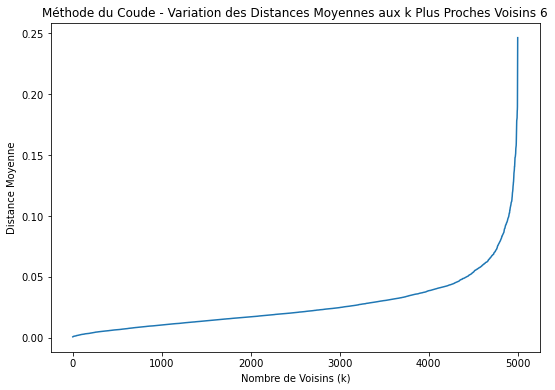

Number of clusters: 32
Number of noise points: 715


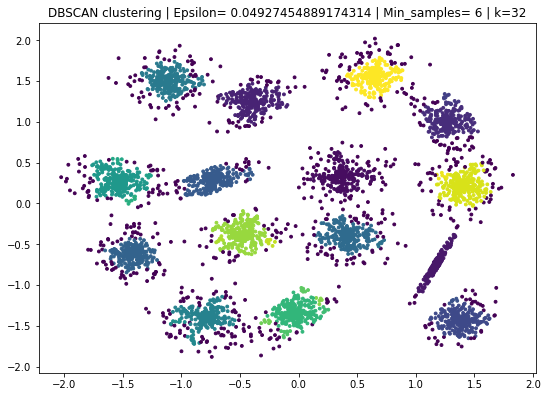

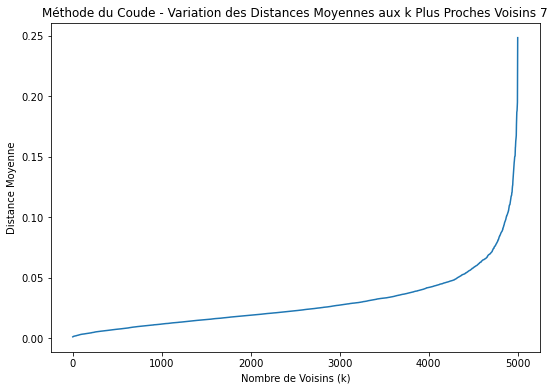

Number of clusters: 24
Number of noise points: 828


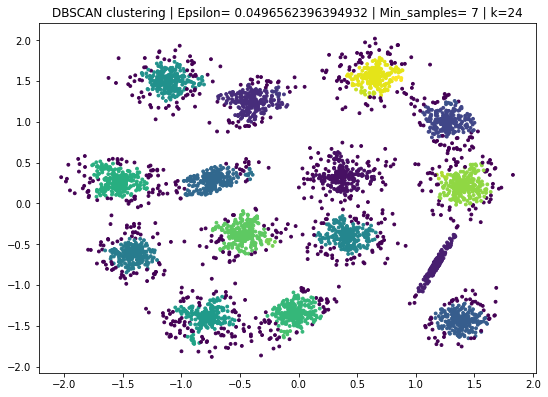

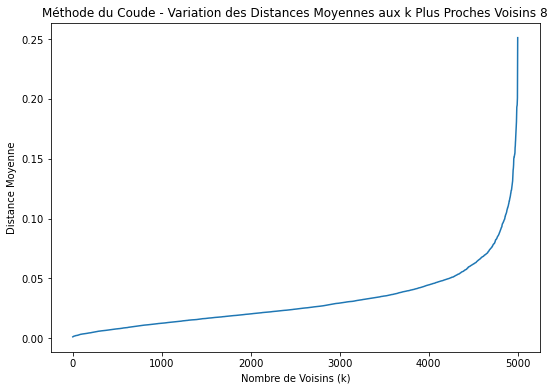

Number of clusters: 24
Number of noise points: 894


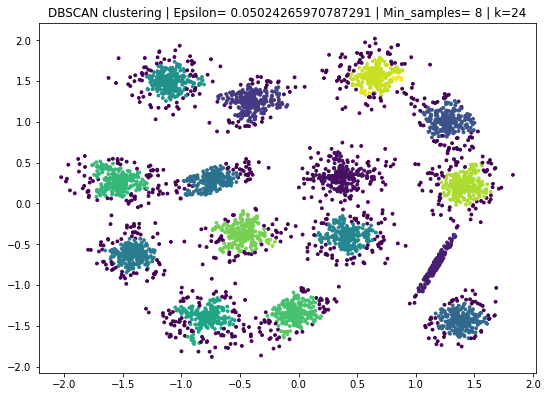

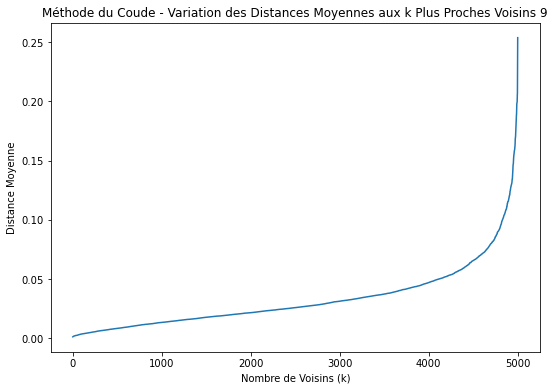

Number of clusters: 21
Number of noise points: 1041


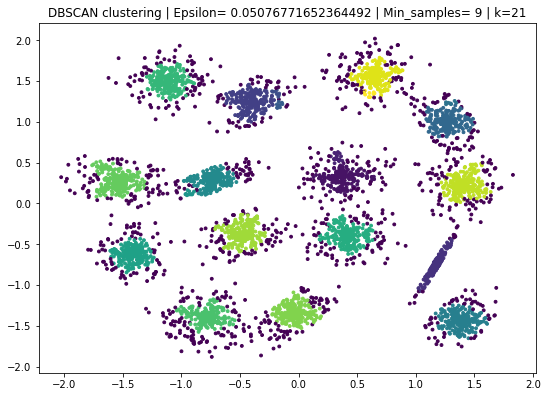

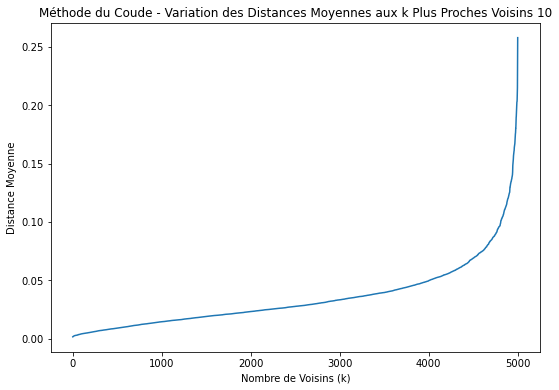

Number of clusters: 23
Number of noise points: 1098


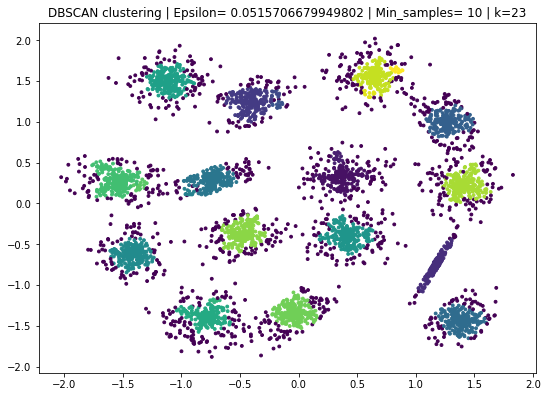

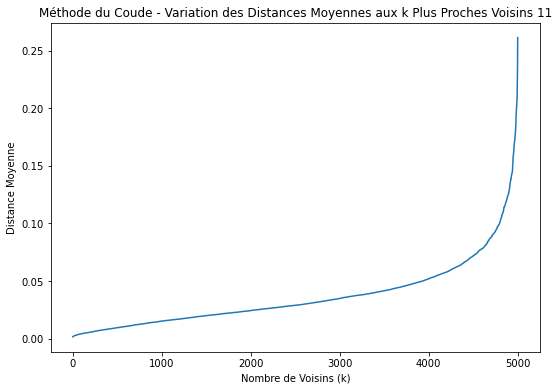

Number of clusters: 21
Number of noise points: 1216


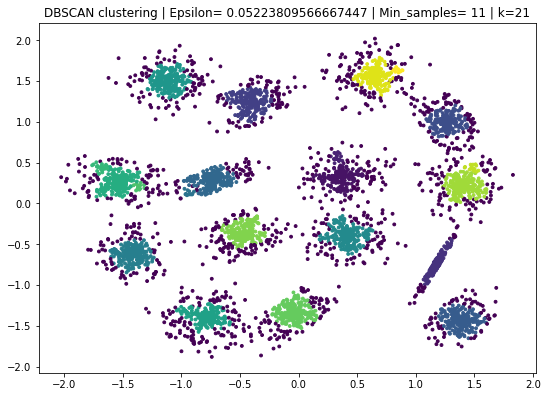

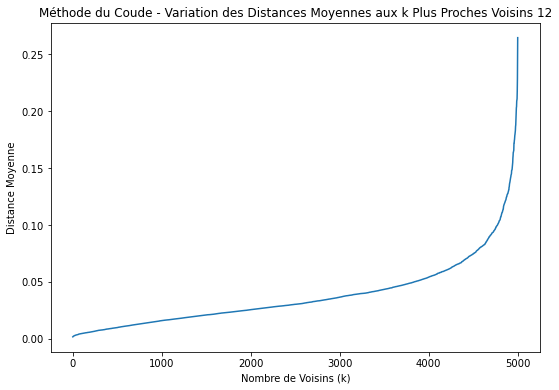

Number of clusters: 19
Number of noise points: 1297


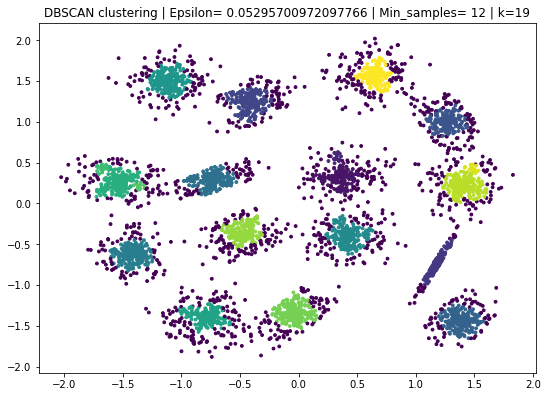

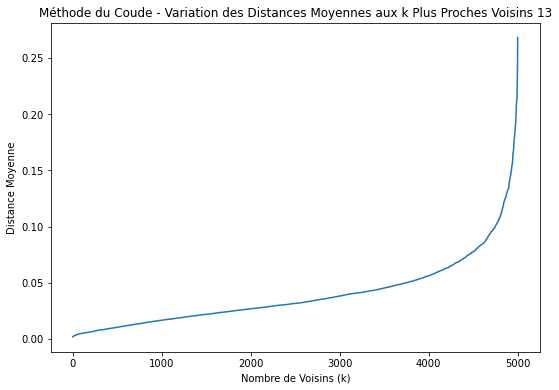

Number of clusters: 18
Number of noise points: 1356


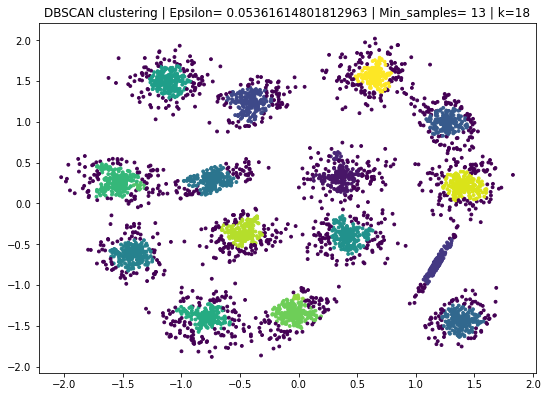

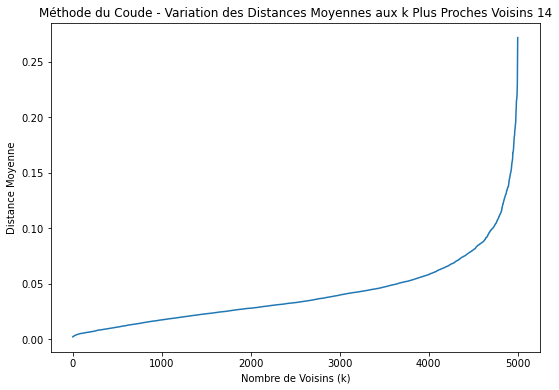

Number of clusters: 17
Number of noise points: 1421


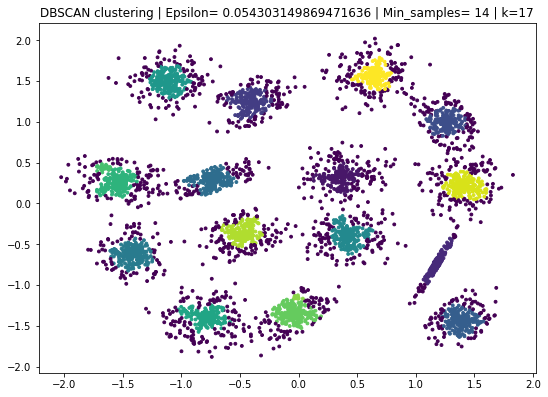

Best silhouette score =  0.357754924579514  | Best min_samples  9  |  Best epsilon :  0.05076771652364492  | Number of clusters :  21
Number of clusters: 298
Number of noise points: 2087


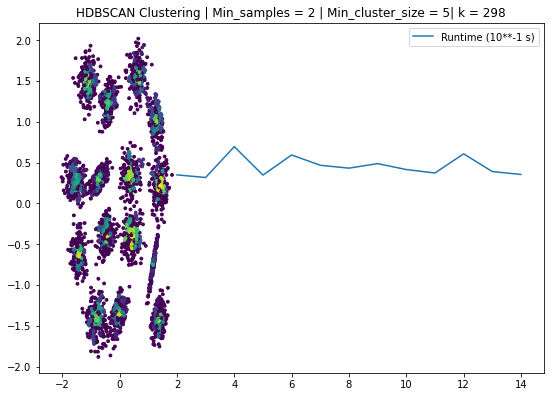

For min_Estimated = 2, number of clusters: 298
The silhouette score is -0.13412931357735913
Number of clusters: 65
Number of noise points: 1199


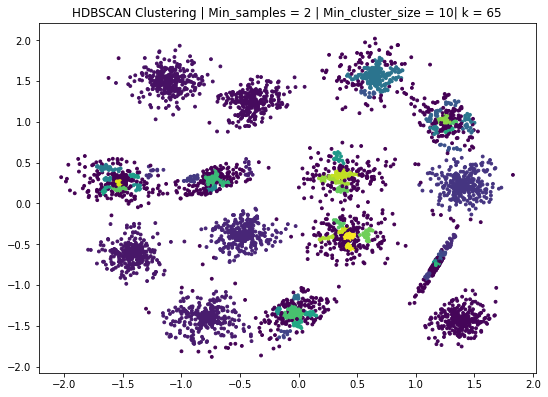

For min_Estimated = 2, number of clusters: 65
The silhouette score is 0.22176882341040455
Number of clusters: 27
Number of noise points: 726


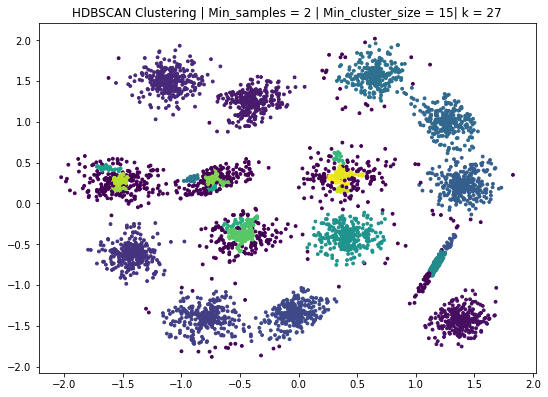

For min_Estimated = 2, number of clusters: 27
The silhouette score is 0.44174822581516027
Number of clusters: 192
Number of noise points: 2056


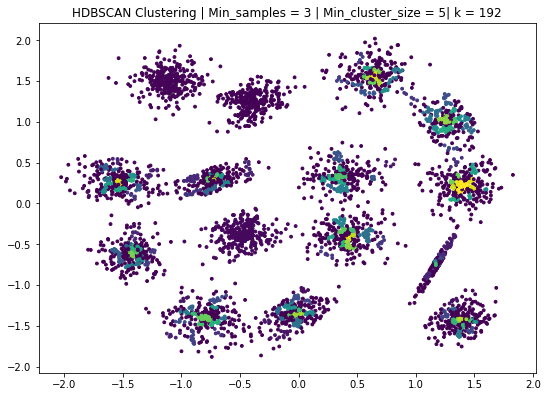

For min_Estimated = 3, number of clusters: 192
The silhouette score is -0.05733076991360733
Number of clusters: 51
Number of noise points: 1185


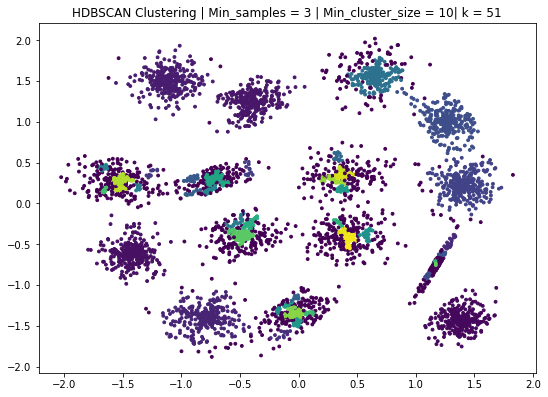

For min_Estimated = 3, number of clusters: 51
The silhouette score is 0.24293400635653134
Number of clusters: 27
Number of noise points: 724


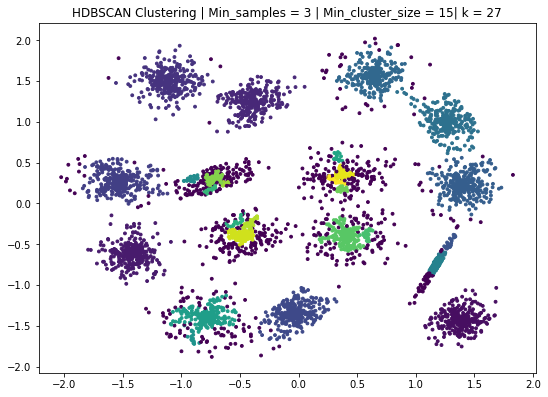

For min_Estimated = 3, number of clusters: 27
The silhouette score is 0.4300517017030138
Number of clusters: 105
Number of noise points: 1580


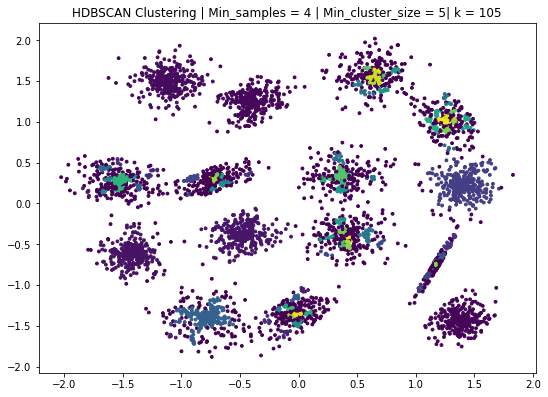

For min_Estimated = 4, number of clusters: 105
The silhouette score is 0.0850695013560605
Number of clusters: 48
Number of noise points: 1854


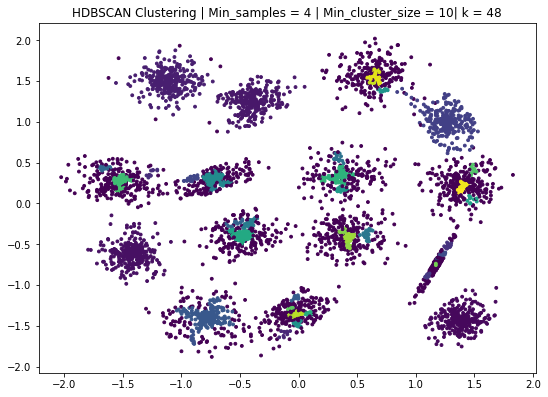

For min_Estimated = 4, number of clusters: 48
The silhouette score is 0.042611026160421055
Number of clusters: 22
Number of noise points: 738


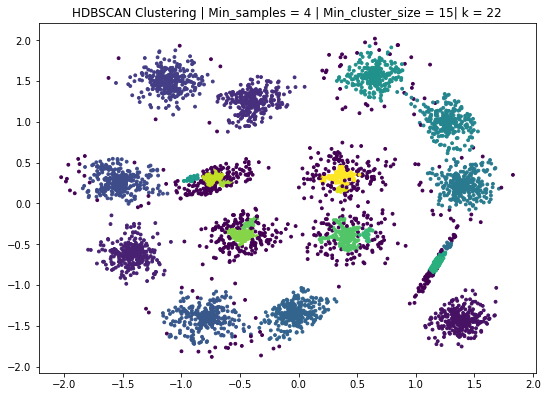

For min_Estimated = 4, number of clusters: 22
The silhouette score is 0.4498773996414511
Number of clusters: 80
Number of noise points: 1725


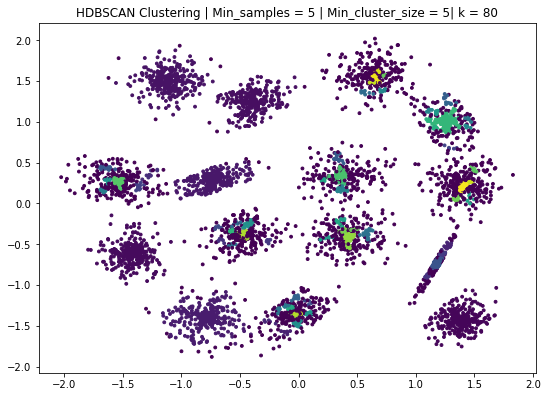

For min_Estimated = 5, number of clusters: 80
The silhouette score is 0.07682288513974726
Number of clusters: 32
Number of noise points: 1046


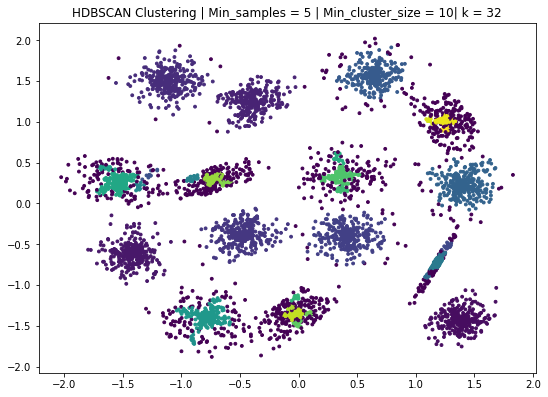

For min_Estimated = 5, number of clusters: 32
The silhouette score is 0.31113106217227
Number of clusters: 21
Number of noise points: 628


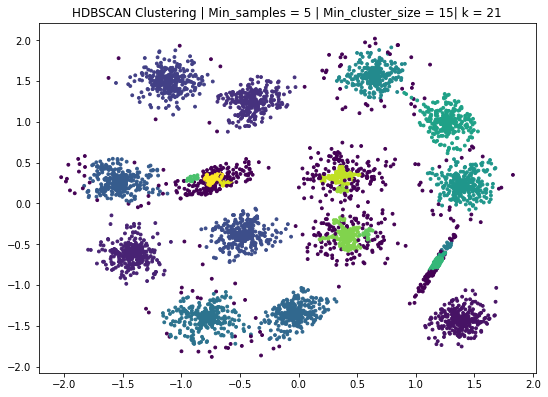

For min_Estimated = 5, number of clusters: 21
The silhouette score is 0.4921522451446981
Number of clusters: 32
Number of noise points: 695


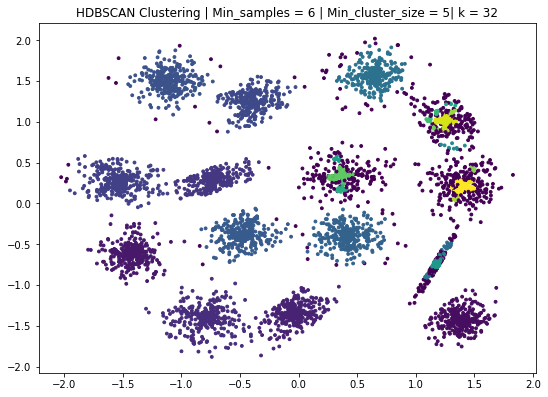

For min_Estimated = 6, number of clusters: 32
The silhouette score is 0.45807192006734093
Number of clusters: 24
Number of noise points: 618


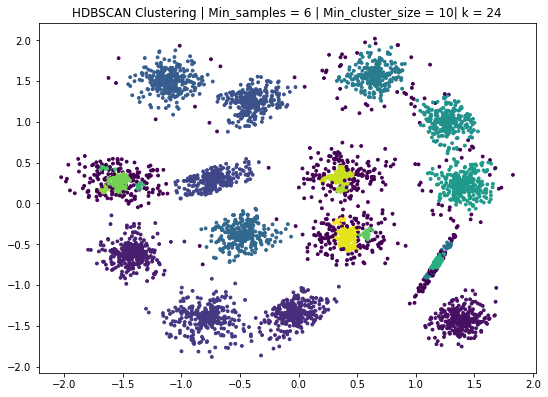

For min_Estimated = 6, number of clusters: 24
The silhouette score is 0.4913659530999458
Number of clusters: 20
Number of noise points: 426


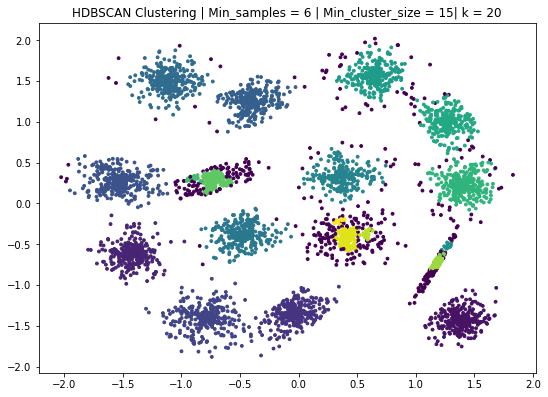

For min_Estimated = 6, number of clusters: 20
The silhouette score is 0.5539395970013038
Number of clusters: 54
Number of noise points: 1740


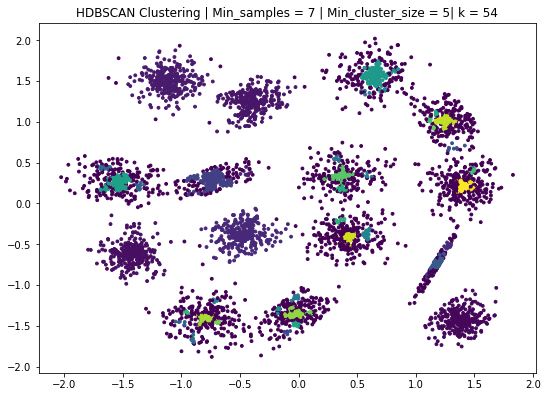

For min_Estimated = 7, number of clusters: 54
The silhouette score is 0.07485746768574318
Number of clusters: 26
Number of noise points: 905


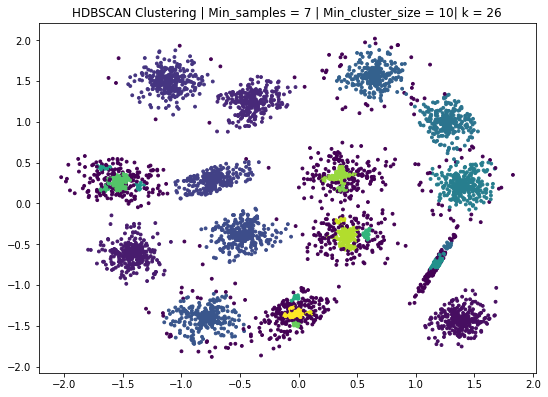

For min_Estimated = 7, number of clusters: 26
The silhouette score is 0.4047446853235676
Number of clusters: 19
Number of noise points: 570


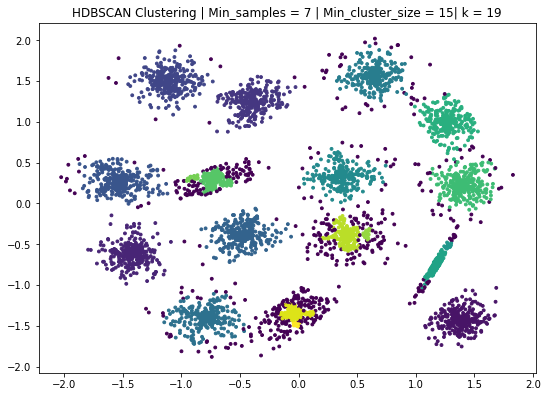

For min_Estimated = 7, number of clusters: 19
The silhouette score is 0.5033686215237884
Number of clusters: 29
Number of noise points: 812


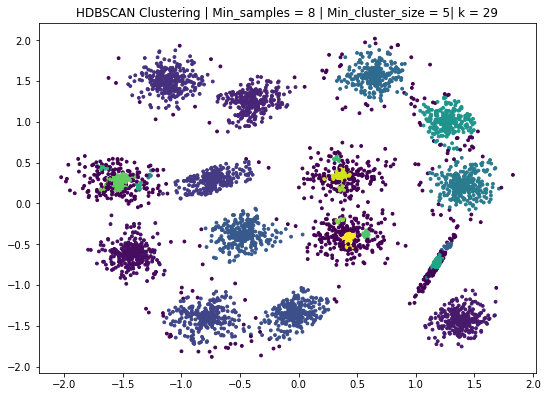

For min_Estimated = 8, number of clusters: 29
The silhouette score is 0.41442274108034305
Number of clusters: 18
Number of noise points: 341


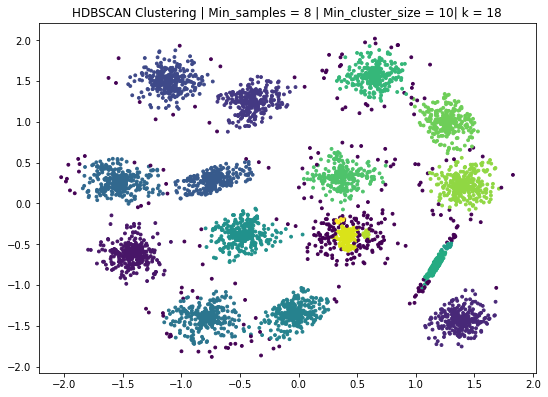

For min_Estimated = 8, number of clusters: 18
The silhouette score is 0.6038071679908041
Number of clusters: 17
Number of noise points: 304


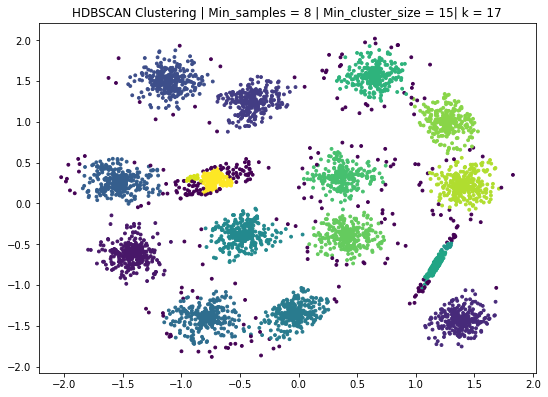

For min_Estimated = 8, number of clusters: 17
The silhouette score is 0.6130309516190622
Number of clusters: 27
Number of noise points: 852


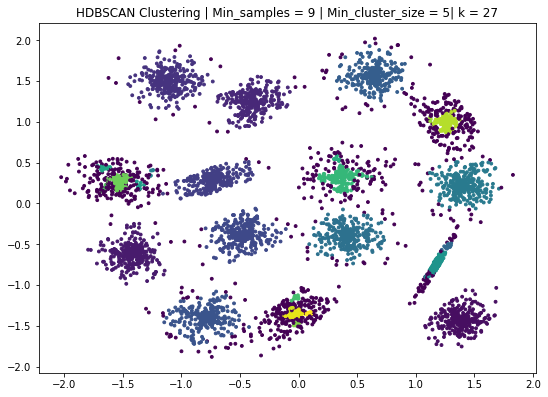

For min_Estimated = 9, number of clusters: 27
The silhouette score is 0.39633531970031693
Number of clusters: 18
Number of noise points: 448


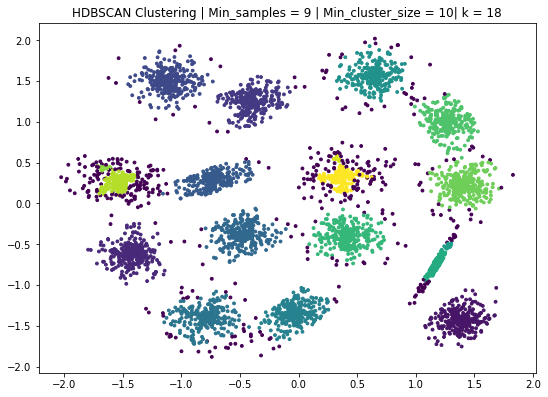

For min_Estimated = 9, number of clusters: 18
The silhouette score is 0.5690234128517164
Number of clusters: 17
Number of noise points: 340


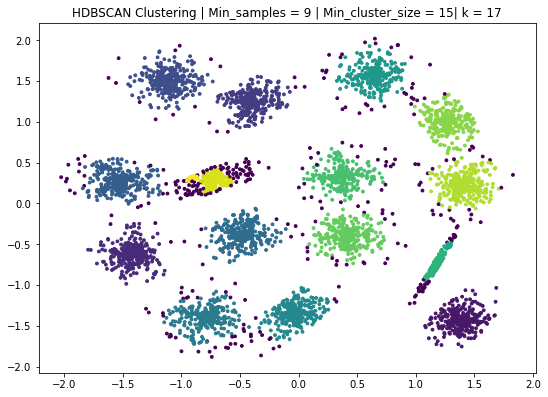

For min_Estimated = 9, number of clusters: 17
The silhouette score is 0.6069616196143054
Best silhouette score = 0.6130309516190622 Best min_samples 8 , Best min_cluster_size :  15 , Number of clusters :  17


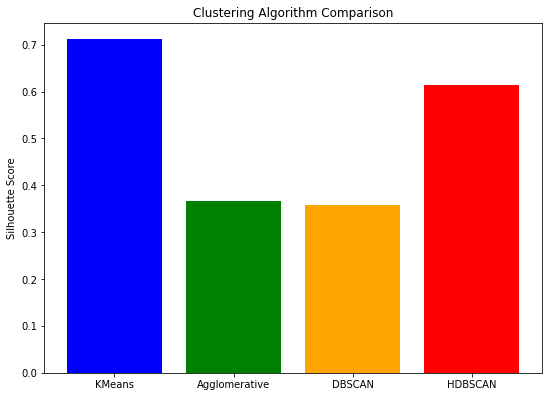

scores :[0.7112892644457176, 0.36712991945984624, 0.357754924579514, 0.6130309516190622]


In [100]:
cluster_comparative_analysis(loaded_data)